In [196]:
import pandas as pd
import numpy as np
import seaborn as sns

In [212]:
# first cell same code, own code below
data = pd.read_csv('mergedv4.csv')
data = data[['text', 'humanization', 'performance', 'autonomy', 'positive', 'neutral', 'negative', 'underestimation']]
# aggregated column "overestimation":
# all comments, that were labeled as 'humanization', 'performance' or 'autonomy'

conditions = [
    (data['humanization'] == 1),
    (data['performance'] == 1),
    (data['autonomy'] == 1),
    (data['humanization'] == 0) & (data['performance'] == 0) & (data['autonomy'] == 0)
]

values = [1,1,1,0]

data['overestimation'] = np.select(conditions, values)
conditions = [
    (data['humanization'] == 1) & (data['performance'] == 1) & (data['autonomy'] == 1),
    (data['humanization'] == 1) & (data['performance'] == 1) & (data['autonomy'] == 0),
    (data['humanization'] == 1) & (data['performance'] == 0) & (data['autonomy'] == 1),
    (data['humanization'] == 0) & (data['performance'] == 1) & (data['autonomy'] == 1),
    (data['humanization'] == 1) & (data['performance'] == 0) & (data['autonomy'] == 0),
    (data['humanization'] == 0) & (data['performance'] == 1) & (data['autonomy'] == 0),
    (data['humanization'] == 0) & (data['performance'] == 0) & (data['autonomy'] == 1)
]

values = ['human_perform_auto', 'human_perform', 'human_auto', 'perform_auto', 'human', 'perform', 'auto']

data['Overestimation'] = np.select(conditions, values)

conditions = [
    (data['positive'] == 1) & (data['negative'] == 0),
    (data['positive'] == 0) & (data['negative'] == 1),
    (data['neutral'] == 1),
    (data['positive'] == 1) & (data['negative'] == 1)
]

values = ['pos', 'neg', 'neut', 'pos_neg']

data['sentiment'] = np.select(conditions, values)

# leave out all comments that were not labelled (keep only those comments which have at least 1 label)
df = data[(data.overestimation == 1)|(data.positive == 1)|(data.negative == 1)|(data.neutral == 1)]
df2 = df[['humanization','performance','autonomy', 'positive', 'neutral', 'negative']].copy()
# calculate correlation matrix
Var_Corr = df2.corr()
# ---- start own code

In [198]:
def process_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    processed_data = []
    pending_comment = ''
    for line in lines:
        line = line.strip()
        parts = line.split(';')
        if 'Output:' in parts[-1] or any(char.isdigit() for char in parts[-1]):
            line = pending_comment + " " + line if pending_comment else line
            processed_data.append(line)
            pending_comment = '' 
        else:
            pending_comment += " " + line if pending_comment else line

    df = pd.DataFrame([x.split(';') for x in processed_data])
    return df

# Usage
file_path = 'message_output_gpt4standard.csv'
df = process_file(file_path)
print(df)
print(df.__len__())

                                                     0  1  2  3  4  5  6  7
0                                                  cgi  0  0  0  0  0  0  0
1    "All this has happened before,""But the questi...  0  0  0  0  0  0  0
2    These robots can dance while I look like a pig...  1  1  0  1  0  0  0
3    Donâ€™t fall for the dancing, these same robot...  0  1  0  0  0  1  0
4    This is terrifying! These same robots that you...  0  0  0  0  0  1  0
..                                                 ... .. .. .. .. .. .. ..
185  Robot dance : trying to look like a human Huma...  1  1  0  0  1  0  0
186                                 é¢ç™½ã™ãŽã‚‹ï½—  0  0  0  0  0  0  0
187          Absolutely stunning!!! xxxxxxxxxxxxxxxxxx  0  0  0  1  0  0  0
188             They'll be twisting on our graves soon  0  1  1  0  0  1  0
189  ðŸ•ºFreakin' Awesome y'all... My Favorite is A...  1  1  0  1  0  0  0

[190 rows x 8 columns]
190


In [199]:
file_path2 = 'message_output.csv.gpt4turbo190.csv'
df2 = process_file(file_path2)
print(df2)
print(df2.__len__())

df_human = pd.read_csv('mergedv4.csv')
df_human = df_human[['text', 'humanization', 'performance', 'autonomy', 'positive', 'neutral', 'negative', 'underestimation']]
print(df_human)
print(df_human.__len__())

                                                     0  1  2  3  4  5  6  7
0                                                  cgi  1  0  0  0  0  0  1
1    "All this has happened before,""But the questi...  0  0  0  0  1  0  1
2    These robots can dance while I look like a pig...  1  0  0  0  0  1  0
3    Donâ€™t fall for the dancing, these same robot...  1  0  0  0  0  1  0
4    This is terrifying! These same robots that you...  1  0  0  0  0  1  0
..                                                 ... .. .. .. .. .. .. ..
176  Robot dance : trying to look like a human Huma...  1  1  0  0  0  0  0
177                                 é¢ç™½ã™ãŽã‚‹ï½—  0  0  0  0  0  0  0
178          Absolutely stunning!!! xxxxxxxxxxxxxxxxxx  0  0  0  1  0  0  0
179             They'll be twisting on our graves soon  0  0  0  0  0  0  0
180  ðŸ•ºFreakin' Awesome y'all... My Favorite is A...  1  1  0  1  0  0  0

[181 rows x 8 columns]
181
                                                  text  huma

In [200]:
count_no_ones = len(df) 
print(f"Total std: {count_no_ones}")
count_no_ones2 = len(df2) 
print(f"Total embedded turbo: {count_no_ones2}")
count_no_ones_human = len(df_human)
print(f"Total human: {count_no_ones_human}")

Total std: 190
Total embedded turbo: 181
Total human: 1000


In [201]:
count_no_ones_human = (df_human.iloc[:, 1:] == 1).any(axis=1).sum()
print(f"Total ones human: {count_no_ones_human}")

df_onlyWith = df[df.iloc[:, 1:].apply(lambda x: x.str.contains('1').any(), axis=1)]
df2_onlyWith = df2[df2.iloc[:, 1:].apply(lambda x: x.str.contains('1').any(), axis=1)]

# get length of both onlyWith and subtract the dflength from it
count_no_ones_onlyWith = count_no_ones - df_onlyWith.__len__()
print(f"Standard non labeled: {count_no_ones_onlyWith}")
count_no_ones2_onlyWith = count_no_ones2 - df2_onlyWith.__len__()
print(f"Turbo non labeled: {count_no_ones2_onlyWith}")
count_no_ones_human_onlyWith = df_human.__len__() - count_no_ones_human
print(f"Total non labeled human: {count_no_ones_human}")

# now get proportion of non labeled
proportion_no_ones = count_no_ones_onlyWith / df_onlyWith.__len__()
print(f"Standard proportion non labeled: {proportion_no_ones}")
proportion_no_ones2 = count_no_ones2_onlyWith / df2_onlyWith.__len__()
print(f"Turbo proportion non labeled: {proportion_no_ones2}")
proportion_no_ones_human = count_no_ones_human_onlyWith / df_human.__len__()
print(f"Human proportion non labeled: {proportion_no_ones_human}")

Total ones human: 746
Standard non labeled: 35
Turbo non labeled: 58
Total non labeled human: 746
Standard proportion non labeled: 0.22580645161290322
Turbo proportion non labeled: 0.4715447154471545
Human proportion non labeled: 0.254


In [202]:
df_onlyWith

,0,1,2,3,4,5,6,7
2,These robots can dance while I look like a pig...,1,1,0,1,0,0,0
3,"Donâ€™t fall for the dancing, these same robot...",0,1,0,0,0,1,0
4,This is terrifying! These same robots that you...,0,0,0,0,0,1,0
5,This probably took so long to program. I hope ...,0,0,0,1,0,0,0
6,This always reminds me of the IMB 7094. We've ...,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...
184,Better than a human in some ways,1,1,0,1,0,0,0
185,Robot dance : trying to look like a human Huma...,1,1,0,0,1,0,0
187,Absolutely stunning!!! xxxxxxxxxxxxxxxxxx,0,0,0,1,0,0,0
188,They'll be twisting on our graves soon,0,1,1,0,0,1,0


In [203]:
df2_onlyWith

,0,1,2,3,4,5,6,7
0,cgi,1,0,0,0,0,0,1
1,"""All this has happened before,""""But the questi...",0,0,0,0,1,0,1
2,These robots can dance while I look like a pig...,1,0,0,0,0,1,0
3,"Donâ€™t fall for the dancing, these same robot...",1,0,0,0,0,1,0
4,This is terrifying! These same robots that you...,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
174,Happy robots ....tecnolÃ³gica happy nee the wolds,1,0,0,1,0,0,0
175,Better than a human in some ways,1,0,0,0,0,1,0
176,Robot dance : trying to look like a human Huma...,1,1,0,0,0,0,0
178,Absolutely stunning!!! xxxxxxxxxxxxxxxxxx,0,0,0,1,0,0,0


In [204]:
# only labels ( columns 1-7 )
df_onlyWith_corr = df_onlyWith.iloc[:, 1:8]

In [205]:
df_onlyWith2_corr = df2_onlyWith.iloc[:, 1:8]

In [206]:
df_onlyWith_corr

,1,2,3,4,5,6,7
2,1,1,0,1,0,0,0
3,0,1,0,0,0,1,0
4,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0
6,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...
184,1,1,0,1,0,0,0
185,1,1,0,0,1,0,0
187,0,0,0,1,0,0,0
188,0,1,1,0,0,1,0


In [207]:
df_onlyWith2_corr

,1,2,3,4,5,6,7
0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,1
2,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0
4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
174,1,0,0,1,0,0,0
175,1,0,0,0,0,1,0
176,1,1,0,0,0,0,0
178,0,0,0,1,0,0,0


In [208]:
df_corr = df_onlyWith_corr.corr()
print(df_corr)

          1         2         3         4         5         6         7
1  1.000000  0.291322  0.202533 -0.021267  0.002127 -0.070479 -0.002345
2  0.291322  1.000000  0.248494  0.176896  0.113782 -0.310683 -0.088687
3  0.202533  0.248494  1.000000 -0.094651  0.022010  0.039494 -0.072655
4 -0.021267  0.176896 -0.094651  1.000000 -0.340825 -0.657989 -0.211339
5  0.002127  0.113782  0.022010 -0.340825  1.000000 -0.350063  0.121728
6 -0.070479 -0.310683  0.039494 -0.657989 -0.350063  1.000000  0.147169
7 -0.002345 -0.088687 -0.072655 -0.211339  0.121728  0.147169  1.000000


In [209]:
# labels can have Output: in them or a string before the number, so we need to only get the number
df_onlyWith2_corr = df_onlyWith2_corr.replace(to_replace=r'Output: ', value='', regex=True)
df2_corr = df_onlyWith2_corr.corr()
print(df2_corr)

          1         2         3         4         5         6         7
1  1.000000  0.253190  0.055087  0.087253 -0.058234 -0.252338 -0.071429
2  0.253190  1.000000  0.048959  0.226000 -0.162466 -0.155925 -0.105690
3  0.055087  0.048959  1.000000  0.024947  0.048959 -0.008242 -0.059728
4  0.087253  0.226000  0.024947  1.000000 -0.241630 -0.414182 -0.117242
5 -0.058234 -0.162466  0.048959 -0.241630  1.000000 -0.286393  0.091278
6 -0.252338 -0.155925 -0.008242 -0.414182 -0.286393  1.000000 -0.026420
7 -0.071429 -0.105690 -0.059728 -0.117242  0.091278 -0.026420  1.000000


<Axes: >

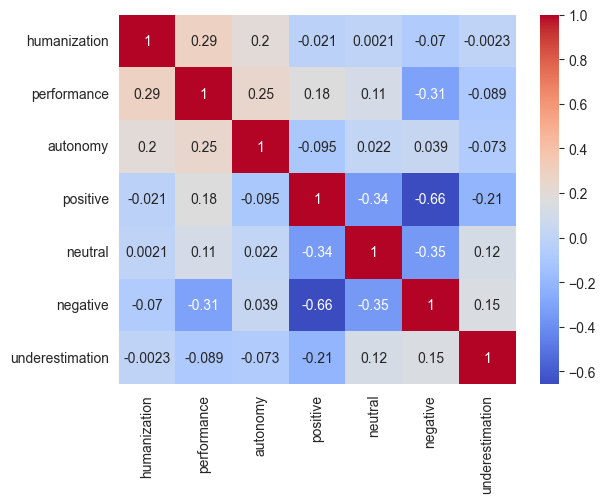

In [210]:
# plot heatmap
labels = ['humanization', 'performance', 'autonomy', 'positive', 'neutral', 'negative', 'underestimation']
# also rows and columns are not in the same order, so we need to set the labels
df_corr.columns = labels
df_corr.index = labels
# non embedd, standard
sns.heatmap(df_corr, cmap="coolwarm", xticklabels=labels, yticklabels=labels, annot=True)

<Axes: >

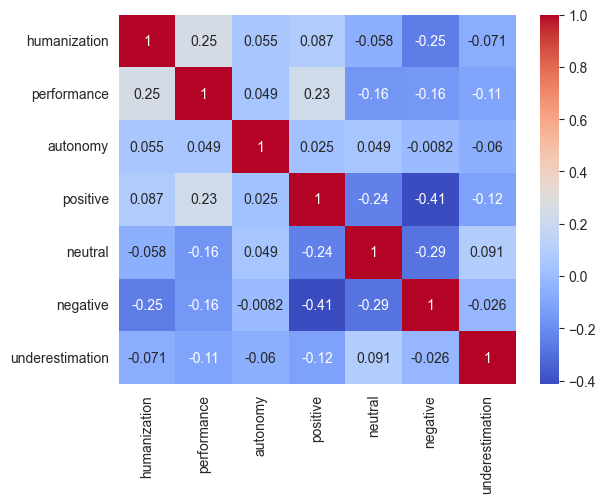

In [211]:
# same rows and columns are not in the same order, so we need to set the labels
df2_corr.columns = labels
df2_corr.index = labels
# embedd turbo
sns.heatmap(df2_corr, cmap="coolwarm", xticklabels=labels, yticklabels=labels, annot=True)

<Axes: >

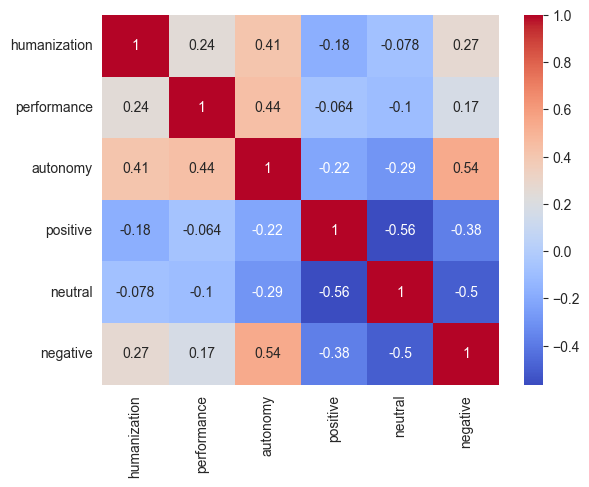

In [213]:
sns.heatmap(Var_Corr, cmap="coolwarm", xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Differences between matrices:
           1         2         3         4         5         6         7
1  0.000000  0.038132  0.147446 -0.108520  0.060361  0.181859  0.069084
2  0.038132  0.000000  0.199535 -0.049105  0.276248 -0.154758  0.017002
3  0.147446  0.199535  0.000000 -0.119598 -0.026949  0.047737 -0.012927
4 -0.108520 -0.049105 -0.119598  0.000000 -0.099195 -0.243808 -0.094096
5  0.060361  0.276248 -0.026949 -0.099195  0.000000 -0.063670  0.030451
6  0.181859 -0.154758  0.047737 -0.243808 -0.063670  0.000000  0.173589
7  0.069084  0.017002 -0.012927 -0.094096  0.030451  0.173589  0.000000

Correlation coefficient: 0.9591329170674372
P-value: 2.049823654064001e-27


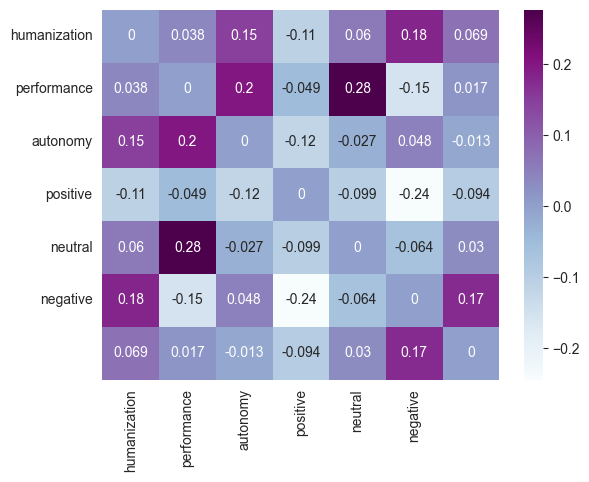

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

diff_ = df_corr - df2_corr
print("Differences between matrices:\n", diff_)
sns.heatmap(diff_, cmap="BuPu", xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Calculating correlation between the two matrices
correlation, p_value = pearsonr(df_corr.values.flatten(), df2_corr.values.flatten())
print("\nCorrelation coefficient:", correlation)
print("P-value:", p_value)

Differences between matrices TURBO & HUMAN:
               humanization  performance  autonomy  positive   neutral  \
humanization      0.000000    -0.009521  0.353399 -0.263884 -0.019640   
performance      -0.009521     0.000000  0.393348 -0.289888  0.059138   
autonomy          0.353399     0.393348  0.000000 -0.243229 -0.340500   
positive         -0.263884    -0.289888 -0.243229  0.000000 -0.322993   
neutral          -0.019640     0.059138 -0.340500 -0.322993  0.000000   
negative          0.520093     0.330272  0.546545  0.032979 -0.215759   

              negative  
humanization  0.520093  
performance   0.330272  
autonomy      0.546545  
positive      0.032979  
neutral      -0.215759  
negative      0.000000  

Correlation coefficient: 0.8197827842784142
P-value: 9.604340247543013e-10


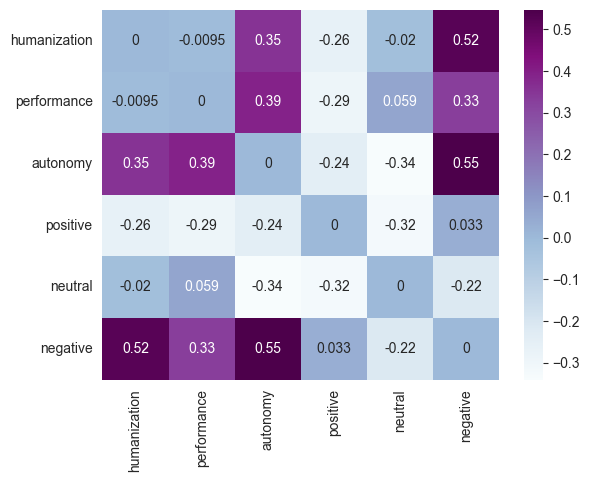

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
#Differences between matrices TURBO & HUMAN

# remove overestimate column from df2_corr (its the 7th column)
df2_corr_humancomp = df2_corr.iloc[:, :6]
# also remove overestimate row from df_corr (its the 7th row), do not use labels
df2_corr_humancomp = df2_corr_humancomp.iloc[:6, :]
# set labels for df2_corr_humancomp
labels = ['humanization', 'performance', 'autonomy', 'positive', 'neutral', 'negative']
df2_corr_humancomp.columns = labels
df2_corr_humancomp.index = labels
Var_Corr.columns = labels
diff_ = Var_Corr - df2_corr_humancomp

print("Differences between matrices TURBO & HUMAN:\n", diff_)
sns.heatmap(diff_, cmap="BuPu", xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Calculating correlation between the two matrices
correlation, p_value = pearsonr(Var_Corr.values.flatten(), df2_corr_humancomp.values.flatten())
print("\nCorrelation coefficient:", correlation)
print("P-value:", p_value)

Differences between matrices TURBO & HUMAN:
               humanization  performance  autonomy  positive   neutral  \
humanization      0.000000    -0.047653  0.205954 -0.155364 -0.080001   
performance      -0.047653     0.000000  0.193813 -0.240783 -0.217110   
autonomy          0.205954     0.193813  0.000000 -0.123631 -0.313550   
positive         -0.155364    -0.240783 -0.123631  0.000000 -0.223799   
neutral          -0.080001    -0.217110 -0.313550 -0.223799  0.000000   
negative          0.338234     0.485030  0.498808  0.276786 -0.152088   

              negative  
humanization  0.338234  
performance   0.485030  
autonomy      0.498808  
positive      0.276786  
neutral      -0.152088  
negative      0.000000  

Correlation coefficient: 0.8693950388023773
P-value: 6.028447981999583e-12


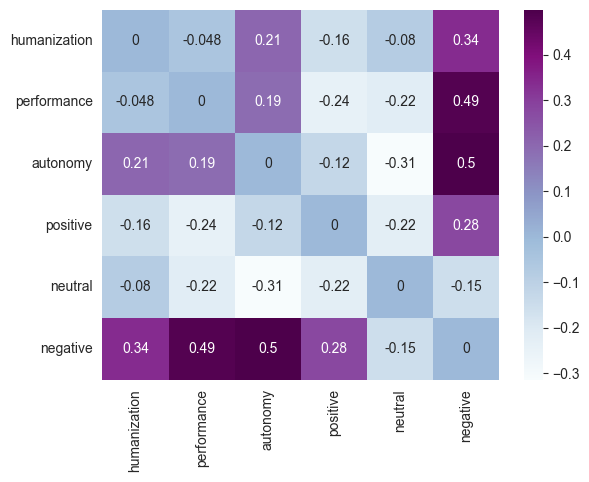

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
#Differences between matrices TURBO & HUMAN

# remove overestimate column from df2_corr (its the 7th column)
df_corr_humancomp = df_corr.iloc[:, :6]
# also remove overestimate row from df_corr (its the 7th row), do not use labels
df_corr_humancomp = df_corr_humancomp.iloc[:6, :]
# set labels for df2_corr_humancomp
labels = ['humanization', 'performance', 'autonomy', 'positive', 'neutral', 'negative']
df_corr_humancomp.columns = labels
df_corr_humancomp.index = labels
Var_Corr.columns = labels
diff_ = Var_Corr - df_corr_humancomp

print("Differences between matrices TURBO & HUMAN:\n", diff_)
sns.heatmap(diff_, cmap="BuPu", xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Calculating correlation between the two matrices
correlation, p_value = pearsonr(Var_Corr.values.flatten(), df_corr_humancomp.values.flatten())
print("\nCorrelation coefficient:", correlation)
print("P-value:", p_value)